# Template Notebook

This notebook will:
- start up amplifier
- start up a task
- do real-time data acquisition in a loop
- check the data in several ways
- plot the data with MNE for inspection
- export the data to a .fif file

In [3]:
# this is needed as long as mushu and wyrm are not a real package in the sense that the other tools are
# others being mne, matplotlib, numpy, scipy, pandas or scikit-learn
# to make them a package would still be on the to-do list

import sys
sys.path.append('/home/nfcontrol/nf/nf-rtime/mushu/')
sys.path.append('/home/nfcontrol/nf/nf-rtime/wyrm/')

In [2]:
import libmushu
amp = libmushu.get_amp('bpamp')

Configure the amp

In [4]:
amp.configure(remotecontrol=False,
              recorderip='20.100.0.3',
              recorderport=51244,
              pathtoworkspace='C:\\Vision\\Workfiles\\NF_64chEEG.rwksp',
              experimentnumber='Pre-Run01',
              subjectid='0001',
              n_channels=64,
              fs=5000)

start the amp - this will 
- 1) call Process DataCurator (the guardian of the Big Data Matrix (Container), which will allocate memory space and to all necessary upkeep) 
Proces will also call
- 2) Recorder which will continue listening to the input port of BP and decode incoming messages

In [6]:
amp.start('t18')

Starting UDP server
Starting TCP server
starting...
OK .. starting the DataCurator.
Start
Number of channels: 64
Sampling interval: 200.0
Resolutions: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 10.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Channel Names: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
libmushu.driver.bptools.datacurator
Loop Starting.
hdr SamplingInterval = 200.00
loop stopp

In [7]:
alld=[]
allm=[]
import time
starttime=time.time()
while time.time() - starttime < 20:
    time.sleep(.502)
    data, marker = amp.get_data()
    alld.append(data)
    for m in marker:
        allm.append(m)
    
    # print('---')
    # print(data.shape)
    # print(marker)

Stop the Amplifier (but retain possibility to query for incoming data)

In [8]:
amp.stop()

requesting to stop the acquisition
amplifier stopped!


# What follows below are several checks of the data and export to other data formats

## check data packets sizes

In [9]:
sizes=[]
for d in alld:
    sizes.append(d.shape)

In [10]:
import numpy as np

(0, 1)

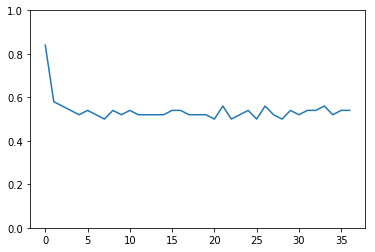

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([x[0]/5000. for x in sizes[1::]])
plt.ylim((0, 1))

## check markers

In [12]:
allm

[(920.0, 'Sync Off'),
 (2920.0, 'Sync Off'),
 (4920.0, 'Sync Off'),
 (320.0, 'Sync Off'),
 (160.0, 'Sync Off'),
 (80.0, 'Sync Off'),
 (500.0, 'Sync Off'),
 (380.0, 'Sync Off'),
 (320.0, 'Sync Off'),
 (200.0, 'Sync Off'),
 (120.0, 'Sync Off'),
 (520.0, 'Sync Off'),
 (360.0, 'Sync Off')]

## Check the saved file

In [13]:
import struct
import json
fhe=open('t18.eeg')
fhm=open('t18.marker')
fhj=open('t18.meta')

### json = header

In [14]:
meta=json.load(fhj)
print(meta)

{'Channels': ['Ch-1', 'Ch-2', 'Ch-3', 'Ch-4', 'Ch-5', 'Ch-6', 'Ch-7', 'Ch-8', 'Ch-9', 'Ch-10', 'Ch-11', 'Ch-12', 'Ch-13', 'Ch-14', 'Ch-15', 'Ch-16', 'Ch-17', 'Ch-18', 'Ch-19', 'Ch-20', 'Ch-21', 'Ch-22', 'Ch-23', 'Ch-24', 'Ch-25', 'Ch-26', 'Ch-27', 'Ch-28', 'Ch-29', 'Ch-30', 'Ch-31', 'Ch-32', 'Ch-33', 'Ch-34', 'Ch-35', 'Ch-36', 'Ch-37', 'Ch-38', 'Ch-39', 'Ch-40', 'Ch-41', 'Ch-42', 'Ch-43', 'Ch-44', 'Ch-45', 'Ch-46', 'Ch-47', 'Ch-48', 'Ch-49', 'Ch-50', 'Ch-51', 'Ch-52', 'Ch-53', 'Ch-54', 'Ch-55', 'Ch-56', 'Ch-57', 'Ch-58', 'Ch-59', 'Ch-60', 'Ch-61', 'Ch-62', 'Ch-63', 'Ch-64'], 'Sampling Frequency': 5000, 'Amp': '<libmushu.driver.brainproducts.BPAmp object at 0x7f8e50107240>'}


In [15]:
meta['Channels']

['Ch-1',
 'Ch-2',
 'Ch-3',
 'Ch-4',
 'Ch-5',
 'Ch-6',
 'Ch-7',
 'Ch-8',
 'Ch-9',
 'Ch-10',
 'Ch-11',
 'Ch-12',
 'Ch-13',
 'Ch-14',
 'Ch-15',
 'Ch-16',
 'Ch-17',
 'Ch-18',
 'Ch-19',
 'Ch-20',
 'Ch-21',
 'Ch-22',
 'Ch-23',
 'Ch-24',
 'Ch-25',
 'Ch-26',
 'Ch-27',
 'Ch-28',
 'Ch-29',
 'Ch-30',
 'Ch-31',
 'Ch-32',
 'Ch-33',
 'Ch-34',
 'Ch-35',
 'Ch-36',
 'Ch-37',
 'Ch-38',
 'Ch-39',
 'Ch-40',
 'Ch-41',
 'Ch-42',
 'Ch-43',
 'Ch-44',
 'Ch-45',
 'Ch-46',
 'Ch-47',
 'Ch-48',
 'Ch-49',
 'Ch-50',
 'Ch-51',
 'Ch-52',
 'Ch-53',
 'Ch-54',
 'Ch-55',
 'Ch-56',
 'Ch-57',
 'Ch-58',
 'Ch-59',
 'Ch-60',
 'Ch-61',
 'Ch-62',
 'Ch-63',
 'Ch-64']

### binary = raw data

In [16]:
import numpy as np

f = open("t18.eeg", "r")
m = np.fromfile(f, dtype=np.float32)

In [17]:
len(m)/64

125500.0

In [18]:
m=m.reshape(round(len(m)/64),64).transpose()

In [19]:
import mne

In [20]:
# Generate some random data

# Initialize an info structure
info = mne.create_info(
    ch_names=meta['Channels'],
    ch_types = ['eeg' for i in range(64)],
    sfreq=meta['Sampling Frequency']
)

custom_raw = mne.io.RawArray(m, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=64, n_times=125500
    Range : 0 ... 125499 =      0.000 ...    25.100 secs
Ready.
<RawArray  |  None, n_channels x n_times : 64 x 125500 (25.1 sec), ~61.4 MB, data loaded>


### markers

In [21]:
with open('t18.marker') as file:
    content = file.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
print(content)

import re

# create the marker matrix
ev_arr=[]
for i, item in enumerate(content):
    out=re.split("[\s|S|T]+", item)
    if 'Sync Off' in item:
        sample = int(float(out[0])/1000*meta['Sampling Frequency'])
        code = 250
    else:
        sample = int(float(out[0])/1000*meta['Sampling Frequency'])
        code = int(out[1])

    # print(out)
    # print(sample)
    ev_arr.append([sample, 0, code])

['920.000000 Sync Off', '2920.000000 Sync Off', '4920.000000 Sync Off', '6920.000000 Sync Off', '8920.000000 Sync Off', '10920.000000 Sync Off', '12920.000000 Sync Off', '14920.000000 Sync Off', '16920.000000 Sync Off', '18920.000000 Sync Off', '20920.000000 Sync Off', '22920.000000 Sync Off', '24920.000000 Sync Off']


In [22]:
l=[x[0] for x in ev_arr]
np.diff(l)

array([10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
       10000, 10000, 10000])

In [23]:
# create marker channel for MNE python:
if ev_arr:
    info = mne.create_info(['STI'], custom_raw.info['sfreq'], ['stim'])
    stim_data = np.zeros((1, len(custom_raw.times)))
    stim_raw = mne.io.RawArray(stim_data, info)
    custom_raw.add_channels([stim_raw], force_update_info=True)

    # create the marker matrix:
    custom_raw.add_events(ev_arr)

Creating RawArray with float64 data, n_channels=1, n_times=125500
    Range : 0 ... 125499 =      0.000 ...    25.100 secs
Ready.


In [24]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib qt5

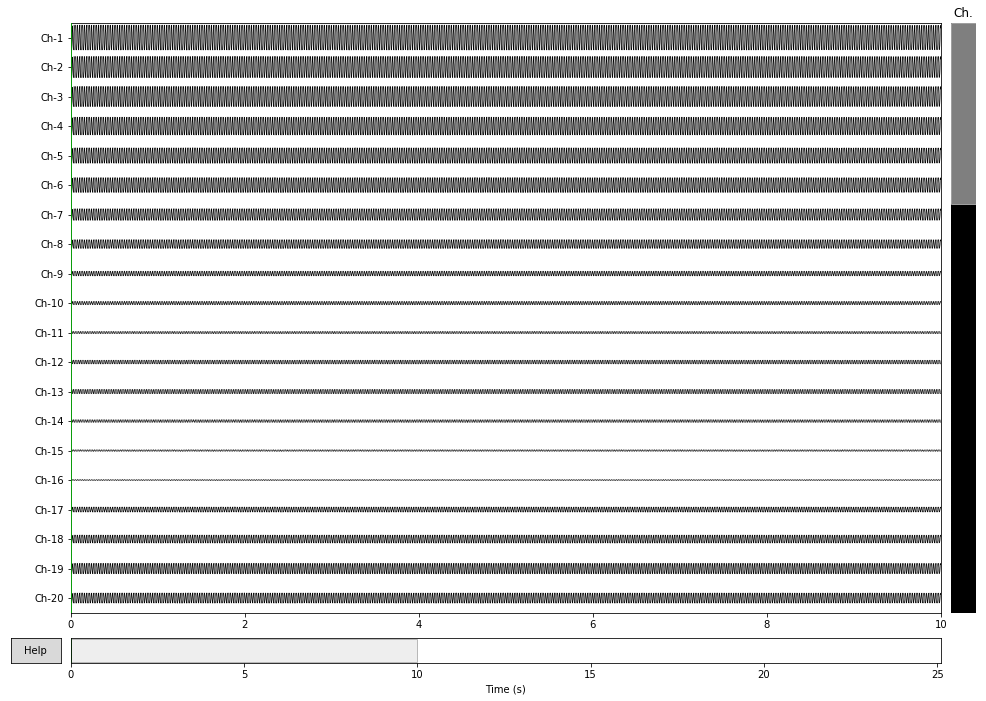

In [30]:
custom_raw.plot(scalings={'eeg': 1000})

In [31]:
custom_raw.save('test18raw.fif', overwrite=True)

Writing /home/nfcontrol/nf/nf-rtime/mushu/test18raw.fif
Closing /home/nfcontrol/nf/nf-rtime/mushu/test18raw.fif [done]
